# Global Terrorism Analysis


<font size= 4>Name: SUPRIYA TIWARI

Email: stiwari3@scu.edu

The data can be obtained from the following URL : https://www.kaggle.com/START-UMD/gtd 
and 
https://www.kaggle.com/rabbitsusan/world-happiness-report 

![title](img/terror.png)

<font size="3">This jupyter file consists of TWO parts:

<font size="3">Part one: Data Preparation and Introduction


<font size="3">Part two: Findings and Analysis

<font size= 5> Part One: 

In [172]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from mpl_toolkits.basemap import Basemap
import seaborn as sns

import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')


import io
import requests
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rc('figure', figsize=(12,10))
%matplotlib inline

import scipy.stats as st
from statsmodels.tsa import stattools as stt
from statsmodels import tsa
import statsmodels.api as smapi
import datetime

from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.simplefilter(action='ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier


import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3, venn3_circles
import matplotlib.image as mpimg


from sklearn.metrics import roc_curve

In [173]:
#importing dataset 1
terrorism = pd.read_csv('terr.csv', low_memory=False)

In [174]:
#checking what the dataset looks like
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [175]:
#importing dataset 2
happiness = pd.read_csv('2017.csv')

In [176]:
#checking what the dataset looks like
happiness.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# Data Cleaning and Merging

In [177]:
#renaming the columns
terrorism.rename(columns={'iyear':'Year',
                   'imonth':'Month',
                   'iday':'Day',
                   'country_txt':'Country',
                   'region_txt':'Region',
                   'attacktype1_txt':'AttackType',
                   'target1':'Target',
                   'nkill':'Killed',
                   'nwound':'Wounded',
                   'summary':'Summary',
                   'gname':'Group',
                   'targtype1_txt':'Target_type',
                   'targsubtype1_txt':'Sub_Target_type',
                   'weapsubtype1_txt':'Sub_Weapon_type',
                   'weaptype1_txt':'Weapon_type',
                   'suicide':'suicide',
                   'motive':'Motive'},inplace=True)


In [178]:
#picking the important columns 
df=terrorism[['Year','Month','Day','Country','Region','city','latitude','longitude'
       ,'AttackType','Killed','Wounded','Target','Group','Target_type','Sub_Target_type',\
          'success', 'suicide','Weapon_type','Sub_Weapon_type','Motive','Summary','addnotes']]
#creating new columns
df['Total_num']=df.Wounded+df.Killed
df.loc[:,'casualities']  = np.where((df.Killed + df.Wounded)>0.0, 1, 0)

In [179]:
#cleaning the data
df=df[(df.Month!= 0)&(df.Day!= 0)]
df=df.drop(['Target'],axis=1)

In [180]:
df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Group', 'Target_type',
       'Sub_Target_type', 'success', 'suicide', 'Weapon_type',
       'Sub_Weapon_type', 'Motive', 'Summary', 'addnotes', 'Total_num',
       'casualities'],
      dtype='object')

In [181]:
df.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Sub_Target_type,success,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,...,Named Civilian,1,0,Unknown,NaN,NaN,NaN,NaN,1.0,1
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,...,"Police Building (headquarters, station, school)",1,0,Firearms,Unknown Gun Type,To protest the Cairo Illinois Police Deparment,1/1/1970: Unknown African American assailants ...,"The Cairo Chief of Police, William Petersen, r...",0.0,0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,...,Police Security Forces/Officers,0,0,Firearms,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,0.0,0


In [182]:
#renaming columns in dataset 2
happiness.rename(columns={'Happiness.Rank':'Happiness_Rank',
                   'Happiness.Score':'Happiness_Score'},inplace=True)

In [183]:
#choosing the columns to keep
df2=happiness[['Country', 'Happiness_Rank', 'Happiness_Score' ]]

In [184]:
df2.head()

,Country,Happiness_Rank,Happiness_Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469


In [185]:
#merging both the datasets
df_new=df.merge(df2, left_on='Country', right_on='Country')

In [186]:
#checking what the new dataset looks like
df_new.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities,Happiness_Rank,Happiness_Score
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,...,0,Unknown,NaN,NaN,NaN,NaN,1.0,1,86,5.23
1,1970,3,24,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Hostage Taking (Kidnapping),0.0,...,0,Unknown,NaN,NaN,NaN,NaN,0.0,0,86,5.23
2,1971,1,28,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Armed Assault,0.0,...,0,Firearms,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,0.0,0,86,5.23
3,1971,1,28,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Armed Assault,0.0,...,0,Firearms,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,0.0,0,86,5.23
4,1971,5,11,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,0.0,...,0,Explosives,Unknown Explosive Type,NaN,NaN,NaN,0.0,0,86,5.23


# PART TWO :  DATA ANALYSIS

# 1. Happiness quotient in the countries most attacked by terrorists

On checking, the most attacked regions, Middle-East and North Africa were the most attacked regions! We also found out that Iraq was the most attacked country. We then checked the Happiness score for the top 10 most attacked countries in Middle-East and North Africa. Surprisingly, Iraq was not the country with the lowest Happiness Score. Syria had the lowest score, followed by Yemen and then Iraq! 

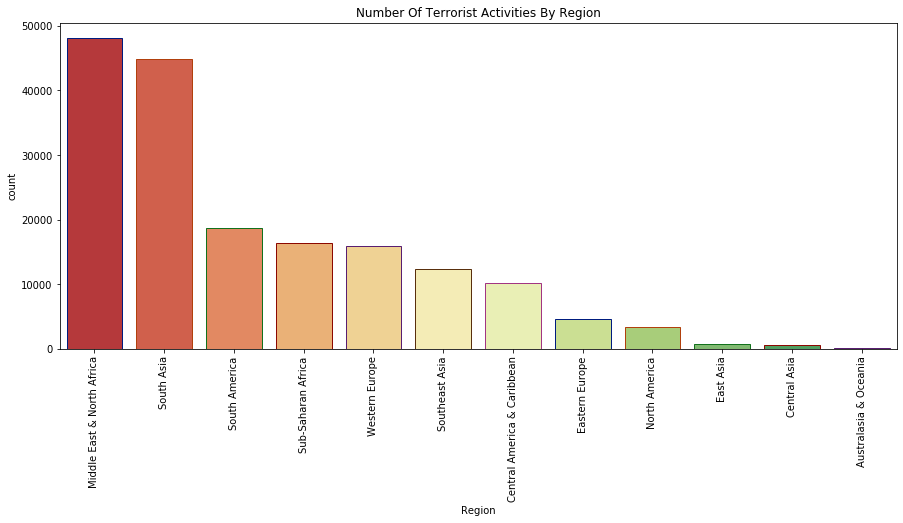

In [187]:
#We will find out the top 10 attacked regions
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df_new,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df_new['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

As we can see, Middle East and North Africa is the Region with the maximum number of terrorist attacks. 

In [188]:
#we will narrow down to only the countries that fall under the region 'Middle East & North Africa'
Region_MiddleEast = df_new[df_new.Region == 'Middle East & North Africa']
Region_MiddleEast.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities,Happiness_Rank,Happiness_Score
13995,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.530243,35.094162,Armed Assault,NaN,...,0,Firearms,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,0,74,5.336
13996,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,...,0,Explosives,Unknown Explosive Type,NaN,NaN,NaN,0.0,0,74,5.336
13997,1970,6,7,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Unknown,0.0,...,0,Unknown,NaN,NaN,NaN,NaN,1.0,1,74,5.336
13998,1970,6,7,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Hostage Taking (Kidnapping),NaN,...,0,Unknown,NaN,NaN,NaN,NaN,NaN,0,74,5.336
13999,1970,6,9,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Hostage Taking (Barricade Incident),0.0,...,0,Firearms,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,0.0,0,74,5.336


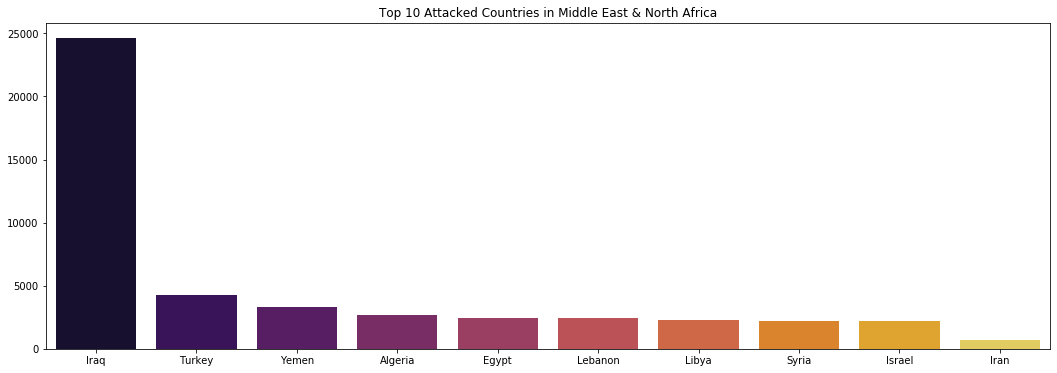

In [189]:
#plot the top 10 countries in this region with the maximum number of terrorist attacks
plt.subplots(figsize=(18,6))
sns.barplot(Region_MiddleEast['Country'].value_counts()[:10].index,Region_MiddleEast['Country'].value_counts()[:10].values,palette='inferno')
plt.title('Top 10 Attacked Countries in Middle East & North Africa')
plt.show()

Iraq, Turkey, Yemen, Algeria, Egypt, Lebanon, Libya, Syria, Israel and Iran are the top 10 attacked countries by the terrorists. We will move forward to check their Happiness Score.

In [190]:
#create a dataframe that consists of the top 10 countries
df_happy=df_new[df_new["Country"].isin(["Iraq","Turkey","Yemen","Algeria","Lebanon", "Libya","Syria","Israel","Iran"])]

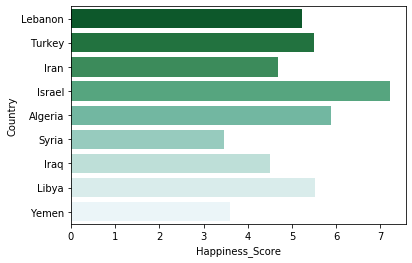

In [191]:
#plot the Happiness score of these top 10 attacked countries
sns.barplot(x='Happiness_Score', y='Country', data=df_happy, palette="BuGn_r")

We can clearly see here that, Syria and Yemen have the lowest Happiness Score, followed by Iraq!

# 2. Deadliest and most active terrorist groups we didn’t know !

Regarding all groups, we will find out which of the groups are the deadliest and the most active ones. We will also see if any/how many of them collide!

Terrorist Groups By Attack Times & Casualties:

In [192]:
#Finding out the number of groups
len(df_new.Group.unique())

3342

In [193]:
#The value count of the top 10 terrorist Groups

df_new['Group'].value_counts().head(10)

Unknown                                             80526
Taliban                                              7469
Islamic State of Iraq and the Levant (ISIL)          5610
Shining Path (SL)                                    4532
Farabundo Marti National Liberation Front (FMLN)     3343
Al-Shabaab                                           3280
New People's Army (NPA)                              2752
Irish Republican Army (IRA)                          2630
Revolutionary Armed Forces of Colombia (FARC)        2465
Boko Haram                                           2418
Name: Group, dtype: int64

In [194]:
#Grouping by group and finding the count and sum
df_terro_group=df_new.groupby('Group').agg({'Group':'count', 'Total_num':'sum'}).\
rename(columns={'Group':"Times"})
df_terro_group=df_terro_group.reset_index()

In [195]:
df_terro_group.head(10)

,Group,Times,Total_num
0,1-May,10,2.0
1,11-Sep,3,0.0
2,14 March Coalition,1,85.0
3,14th of December Command,3,0.0
4,15-May,1,0.0
5,15th of September Liberation Legion,1,1.0
6,16 January Organization for the Liberation of ...,24,33.0
7,1920 Revolution Brigades,2,34.0
8,19th of July Christian Resistance Brigade,1,1.0
9,1st of May Group,3,0.0


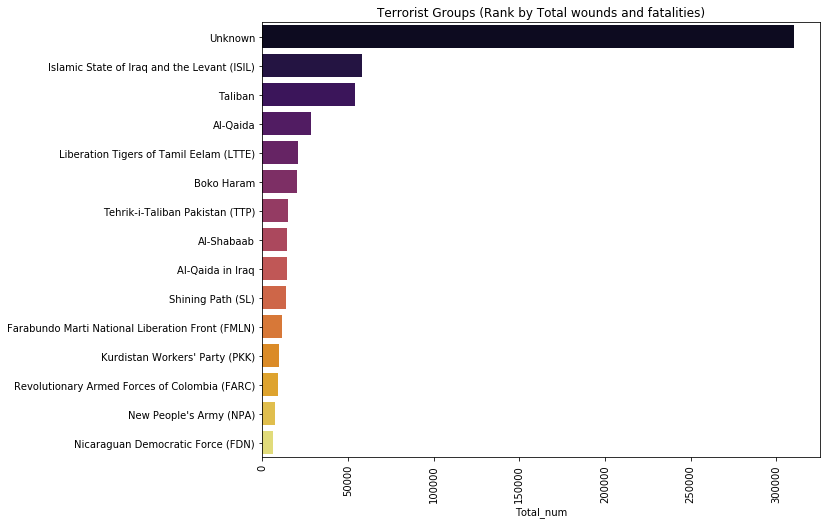

In [196]:
#plotting the terrorist groups by fatalities(wounded and killed)
sns.barplot(x=df_terro_group.Total_num.nlargest(15)[0:15], y=df_terro_group.iloc[df_terro_group.Total_num.nlargest(15)[0:15].index].Group.values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups (Rank by Total wounds and fatalities)')
plt.show()

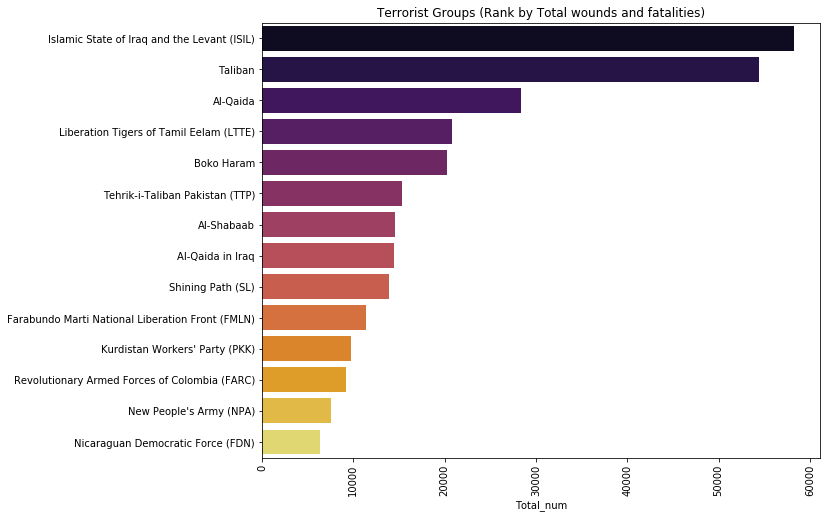

In [197]:
#We will remove the unknown group
sns.barplot(x=df_terro_group.Total_num.nlargest(15)[1:15], y=df_terro_group.iloc[df_terro_group.Total_num.nlargest(15)[1:15].index].Group.values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups (Rank by Total wounds and fatalities)')
plt.show()

Text(0.5, 1.0, 'Terrorist Groups (Rank by attack times)')

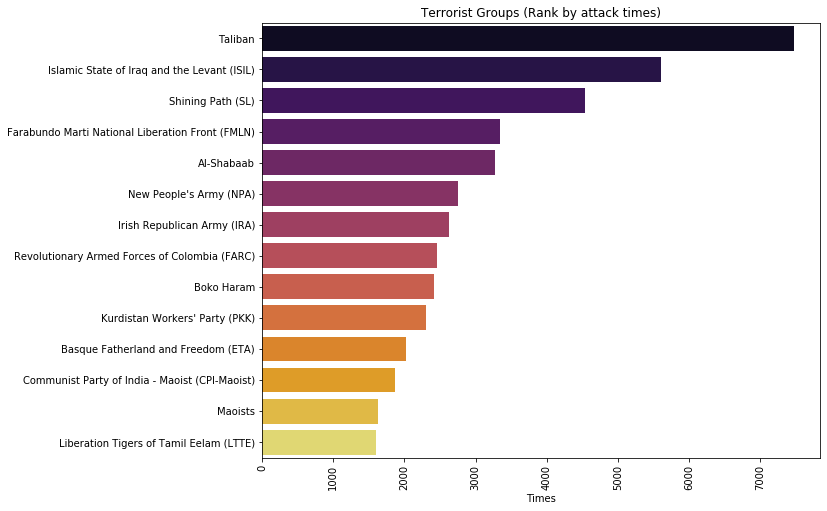

In [198]:
##plotting the terrorist groups by times(number of times they attacked)
sns.barplot(x=df_terro_group.Times.nlargest(15)[1:15], y=df_terro_group.iloc[df_terro_group.Times.nlargest(15)[1:15].index].Group.values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups (Rank by attack times)')

The following plot is the groups ranked by number of casualties also excluding the unkown group. Comparing the groups in these two ranks we noticed that there have some overlaps,they are quite different.(Al qaida which responsible for 911 attack in 2012 US) o named these groups 'active' and 'deadliest'

<font size="4"> Secondly, Subset Terrorist Groups Based On Two Standards: attack times and deaths. 


In [199]:
##Subsetting one group by attack times, choosing top 100
##Time Max
index_times_100=df_new.groupby('Group').size()[df_new.groupby('Group').size().values!=1].nlargest(100).index
value_times_100=df_new.groupby('Group').size()[df_new.groupby('Group').size().values!=1].nlargest(100).values
df_times_100=df_new[df_new['Group'].isin(index_times_100)]

In [200]:
##Subsetting another group by casualities numbers, choosing top 100.
##Dead Max
index_dead_100=df_new.groupby('Group').agg({'Total_num':'sum'}).Total_num.nlargest(100).index
values_dead_100=df_new.groupby('Group').agg({'Total_num':'sum'}).Total_num.nlargest(100).values
df_dead_100=df_new[df_new['Group'].isin(index_dead_100)]

In [201]:
#create datasets for attack and casualty
group_times_100=pd.DataFrame({'Group_Name':index_times_100, 'Value_Times':value_times_100})
group_dead_100=pd.DataFrame({'Group_Name':index_dead_100, 'values_dead':values_dead_100})

In [202]:
#setting the indexes
group_times_100=group_times_100.set_index(['Group_Name'])
group_dead_100=group_dead_100.set_index(['Group_Name'])

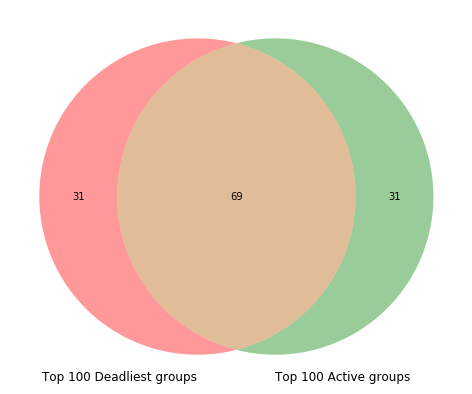

In [203]:
#creating a venn diagram to portray how many of the two groups coincide
set1 = set(group_dead_100.index)
set2 = set(group_times_100.index)
venn2([set1, set2], ('Top 100 Deadliest groups', 'Top 100 Active groups'))
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.show()

We drew the venn graph of 100 groups from 'active' and 'deadliest' and found that there are 69 groups overlapping, so 69 of the groups are both the deadliest as well as active.

# 3. Prediction

For the prediction part, we want to figure out which factors matter the most when we want to predict the outcome(casuality or no casuality) of an attack. To accomplish a study on this, we set casualty value (killed + injured) as our target variable and other variable as our predictors.

In [204]:
terrorism = terrorism[['Year','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terrorism['casualities']=terrorism['Killed']+terrorism['Wounded']
terrorism.head(10)

,Year,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
5,1970,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
6,1970,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0
7,1970,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0
8,1970,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0


In [205]:
#cleaning the NAs
terrorism.dropna(how = 'all', inplace=True)
terrorism.shape

(181691, 16)

In [206]:
# Before we do the classification, we may want to delete some columns like city and motive since some of them may have
# linear relationship with other columns like killed and some of them has too many missing value like motive

terrorism_cm = terrorism.drop(columns = ['Motive','Target','Killed','Wounded','Summary','city'])

In [207]:
# Encode category predictors into numbers
labelEncoding = LabelEncoder()
terrorism_cm['Country'] = labelEncoding.fit_transform(terrorism_cm['Country'])
terrorism_cm['AttackType'] = labelEncoding.fit_transform(terrorism_cm['AttackType'])
terrorism_cm['Target_type'] = labelEncoding.fit_transform(terrorism_cm['Target_type'])
terrorism_cm['Weapon_type'] = labelEncoding.fit_transform(terrorism_cm['Weapon_type'])
terrorism_cm['Region'] = labelEncoding.fit_transform(terrorism_cm['Region'])
terrorism_cm['Group'] = labelEncoding.fit_transform(terrorism_cm['Group'])


In [208]:
#Keep casualities as 0 or 1(if the number is 1 or above)
terrorism_cm['casualities'] = terrorism_cm['casualities'].apply(lambda x: 0 if x == 0 else 1)

In [209]:
terrorism_cm.head(5)

,Year,Country,Region,latitude,longitude,AttackType,Group,Target_type,Weapon_type,casualities
0,1970,47,1,18.456792,-69.951164,1,1909,13,10,1
1,1970,116,6,19.371887,-99.086624,6,16,5,10,0
2,1970,140,9,15.478598,120.599741,1,3408,7,10,1
3,1970,68,11,37.997490,23.762728,2,3408,5,2,1
4,1970,90,3,33.580412,130.396361,3,3408,5,5,1


In [210]:
len(terrorism_cm)

181691

In [211]:
# We drop na 
terrorism_cm = terrorism_cm.dropna()
len(terrorism_cm)

177134

In [212]:
len(terrorism_cm[terrorism_cm['casualities'] == 0])

61703

In [213]:
# Cross Validation

# Split data for training data and validation data
X = terrorism_cm[['Year','Country','Region','latitude','longitude','AttackType','Group','Target_type','Weapon_type']]
valid = terrorism_cm['casualities']

X_train, X_test, valid_train, valid_test = train_test_split(X, valid, test_size=0.3)

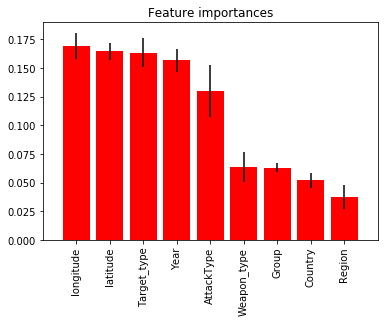

In [214]:
# Compute the feature importances with random forest
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X, valid)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
fnames = [['Year','Country','Region','latitude','longitude','AttackType','Group','Target_type','Weapon_type'][i] for i in indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

<font size= 4> As we can see, longitude, latitude and target type are the factors that matter the most for the outcome of the attack.

In [215]:
# Train the model
X = terrorism_cm[['Year','Country','latitude','longitude','AttackType','Group','Target_type','Weapon_type']]
valid = terrorism_cm['casualities']

X_train, X_test, valid_train, valid_test = train_test_split(X, valid, test_size=0.3)

In [216]:
#Check the accuracy
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, valid_train)
pred = model.predict(X_test)
np.mean(pred == valid_test)

0.8195178863777498

<font size= 4>We can see from above, the accuracy result is about 81.95%. This proves that the result from our feature importance analysis is almost accurate.

Confusion matrix, without normalization
[[13728  4878]
 [ 4713 29822]]
Normalized confusion matrix
[[0.74 0.26]
 [0.14 0.86]]


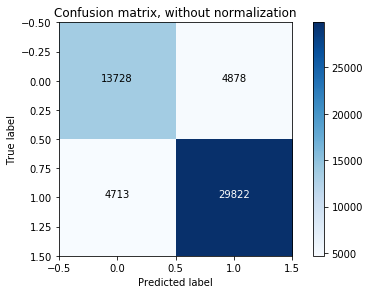

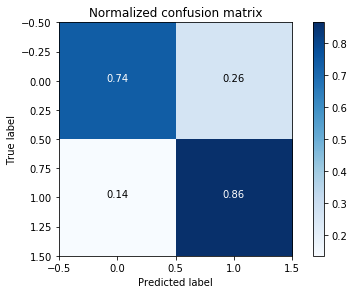

In [217]:
##Confusion Matrix
cnf_matrix = confusion_matrix(valid_test, pred)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

The result shows that about the True Positive rate reaches about 0.86 whereas the True Negative rate reaches about 0.74.

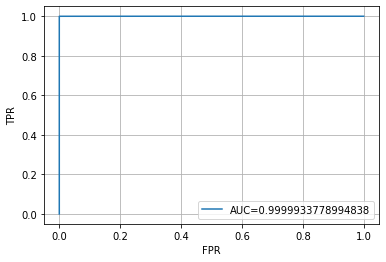

In [218]:
## ROC curve
score = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(pred, score, pos_label=1)
auc = np.trapz(tpr, fpr)

plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 

As it can be seen from the AUC analysis that, the curve is pretty close to the upper left of the plot, demonstrating a high overall accuracy. (There exists a moment that True positive rate could be high whereas false positive rate could be maintained at a pretty low value)

# CONCLUSION: 

We analyzed terrorism thoroughly and found out that the most attacked country in the world is not the most unhappy! We also found out which terrorist groups are the deadliest and most active. 
We predicted the factors that matter the most when we want to predict the outcome(casuality or no casuality) of an attack. 

<font size = 4> REFERENCES:

https://www.udemy.com/course/a-gentle-introduction-to-machine-learning-using-scikit-learn/learn/lecture/6673414#overview

https://www.kaggle.com/rabbitsusan/world-happiness-report

https://www.kaggle.com/tomduff/predict-success-of-terrorist-act

https://www.kaggle.com/ash316/terrorism-around-the-world/notebook

https://www.kaggle.com/vamsikrishna/happiness-index-and-terrorism

https://www.kaggle.com/jmanders/the-happy-pears-predicting-terrorism-casualties

https://www.kaggle.com/daansterk/predicting-terrorism-casualties-the-happy-pears#4.-Predictive-analysis

https://www.kaggle.com/gouthamvarma/predicting-success-of-a-terrorist-attack-in-india

https://www.youtube.com/watch?v=GwIo3gDZCVQ&list=PL9ooVrP1hQOHUfd-g8GUpKI3hHOwM_9Dn